# **Music Recommendation System**
## ***Alireza Akbarzadeh***
**Capstone Submission**<br>
**13.04.23**

***This is the project I submitted as the capstone project for the fulfillment of the Applied Data Science Program offred by MIT Professional Education.***

## **Problem Definition**<br>
### **The Context**:
The rise of online music providers such as Spotify, Apple Music, Youtube Music, and Tidal has had a significant impact on the music industry. These platforms provide users with access to a vast library of songs and albums, personalized playlists and sharing features, and a convenient and cost-effective way to access music. One of the key features of online music providers is recommendation systems, which use algorithms to analyze a user's listening history, playlist choices, and other data to generate personalized recommendations for songs, albums, and playlists. Recommendation systems help users discover new music, increase user engagement, and support a more diverse and vibrant music ecosystem. Artists and music producers also benefit from recommendation systems, as they can help promote their music to new audiences and increase their exposure.<br>

### **The Objective**:
The objectives can be divided in several folds:
- Analyze user interactions with songs
- Perform statistical analysis on collected data
- Apply collaborative filtering and content-based filtering algorithms
- Predict user interactions with new songs
- Recommend new songs with high likelihood of being played
- Use popularity-based filtering for new users
- Increase chance of newly released songs being played
- Continuously evaluate the performance of the recommendation system and refine the algorithms ,br>

### **The Key Questions**:
The key questions to answer in this project are as follows:
- What data is available and what features are included in it?
- How can the data be preprocessed and cleaned for analysis?
- Which machine learning algorithm is suitable for the project?
- How can the algorithm be optimized for better performance?
- Which metrics should be used to evaluate the performance of the recommendation?
- How should the cold start problem for a new user and a new song be handled?
- How is it ensured that the recommendation system is fair and unbiased for all users?
- How will the balance between recommendations for popular and niche music, and new and older songs be maintained?
- How can the system be improved over time through user feedback and new data?<br>

### **The Problem Formulation**:
Using data science, I am trying to build a recommendation system for the online music industry that can analyze user interactions with provided songs and suggest new songs based on predictions of user preferences. The problem can be formulated as how to design and implement a machine learning-based system that can effectively and accurately recommend songs to users based on their past listening behavior and preferences.






## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

**song_data**

*song_id*: A unique id given to every song

*title*: Title of the song

*Release*: Name of the released album

*Artist_name*: Name of the artist 

*year*: Year of release

**count_data**

*user_id*: A unique id given to the user

*song_id*: A unique id given to the song

*play_count*: Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Installing Surprise Library!**

In [2]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Importing the necessary libraries**

In [3]:
import warnings                                 
warnings.filterwarnings('ignore')

from tqdm import tqdm

import numpy as np                              
import pandas as pd
import math

import matplotlib.pyplot as plt                 
import seaborn as sns
from wordcloud import WordCloud                          

# A dictionary output that does not raise a key error
from collections import defaultdict             

from sklearn.metrics import mean_squared_error  

from sklearn import preprocessing       

# To find the similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity 

# To compute the accuracy of models
from surprise import accuracy

# Class to parse a file containing ratings, data should be in structure - user; item; rating
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the rating data in train and test datasets
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing K-Fold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

**Loading the datasets**

In [4]:
# Import the dataset
song_data = pd.read_csv('/content/drive/MyDrive/Capstone_Project_MIT_Data_Science/song_data.csv')
count_data = pd.read_csv('/content/drive/MyDrive/Capstone_Project_MIT_Data_Science/count_data.csv')

song_data_copy = song_data.copy(deep = True) # Copying the data to another DataFrame
count_data_copy = count_data.copy(deep = True) # Copying the data to another DataFrame

**Display the first 5 rows of song_data dataset** <br>

In [5]:
song_data.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


It is seen that the dataset has 5 columns including the song_id, title, the release (name of album), artist_name, and the year of release. We see that the releasing year of the fourth song is indicated as zero, which is not true. I will take care of such odd situations later when I combine the datasets and filter the final dataset according to a threshold on the play_count.

**Display the first 5 rows of count_data dataset** <br>

In [6]:
count_data.head()

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


It is seen that the dataset has 5 columns including the Unnamed: 0, user_id, song_id, and the play_count.

**Drop the "Unnamed: 0" column** <br>
As the "Unnamed: 0" column will not be used during this project, I will drop it here.

In [7]:
# Drop 'Unnamed: 0' column
count_data = count_data.drop('Unnamed: 0', axis = 1) 

In the next few follwoing cells, I will explore basic information regarding the song_data and count_data datasets. 

In [8]:
# Display general information about song_data dataset
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


It is observed that the song_data dataset has 1000000 entries in song_id, artist_name, and year columns, while the number of entries in the title and release columns are 999985 and 999995, respectively. It means that there are missing entries in the song_data dataset. I will come back to this issue after I apply a threshold filter on the play_count. <br>
It is also noticed that the data type of the columns included in the song_data dataset are object (the first four columns) and int64 (the last column) types. Moreover, the memory used to store this dataset is around 38.1 MB.

In [9]:
# Find number of unique songs in song_data dataset
song_data['song_id'].nunique()

999056

Interestingly, it is observed that the number of unique songs based on there ids is 999056, which is less than the total number entries in the song_id column. It means that we have duplications in the dataset. I will come back to this issue after I apply a threshold filter on the play_count.

In [10]:
# Display general information about count_data dataset
count_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   user_id     object
 1   song_id     object
 2   play_count  int64 
dtypes: int64(1), object(2)
memory usage: 45.8+ MB


It is observed that, the after dropping "Unnamed: 0" columns, the count_data dataset has three columns wmong which the first two are object type and the last one is int64 type. There are 2000000 entries in the dataset, which are essentailly indicating the number of interactions various users have had with various songs. The memory used to store the dataset is around 45.8 MB.

In [11]:
# Find the number of unique users in count_data dataset
count_data['user_id'].nunique()

76353

It is seen that there are 76353 number of unique users in the dataset. As a single user may play multiple songs, the number of unique users is less than the number of entries in the dataset.

In [12]:
# Find number of unique songs in count_data dataset
count_data['song_id'].nunique()

10000

It is interesting to see that among the 999056 number of entries for the song_id documented in the song_data dataset, only 10000 songs appear in the count_data dataset. It makes sense, for not all the songs may have been played by all the users.

**Left merge the two datasets, i.e. song_data and count_data, on the "song_id" feature** <br>
In the cell below, I merge the two datasets on the "song_id" feature with the "left" method and assign the outcome to a new dataset named df. 

In [13]:
df = count_data.merge(song_data, on='song_id', how='left')

In [14]:
# Display the firts 10 rows of the new dataframe (df)
df.head(10)

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5,Apuesta Por El Rock 'N' Roll,Antología Audiovisual,Héroes del Silencio,2007
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1,Paper Gangsta,The Fame Monster,Lady GaGa,2008
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1,Stacked Actors,There Is Nothing Left To Lose,Foo Fighters,1999
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1,Sehr kosmisch,Musik von Harmonia,Harmonia,0


By looking at the above display, the second and third rows are identical. Hence , we have duplicats in the new dataset. In the following three cells, first, I display the shape of the new dataset. Then I inspect if we have missing values. Eventually, I will remove the duplicats.

In [15]:
# Display the shape of df dataframe
df.shape

(2086946, 7)

We see that the new dataset after merging has 2086946 rows and 7 columns.

In [16]:
# Check if there is any null entry in the dataset
df.isnull().sum()

user_id        0
song_id        0
play_count     0
title          0
release        0
artist_name    0
year           0
dtype: int64

It is seen that there is no missing values, i.e. "NaN" or empty entry, in the dataset. However, as we noticed some of the songs may have been given 0 as their releasing year. I will double check that after applying the threshold filter on the play_count feature.

In [17]:
# Drop the duplicates in the dataset and re-arrange the indices 
df = df.drop_duplicates(ignore_index = True)

In [18]:
# Display the shape of df dataframe after duplicates removal
df.shape

(2054534, 7)

After dropping the duplicates, the shape of the dataset is (2054534, 7), which means that compared to the shape of the dataset before duplicates removal, there are 32412 (=2086946 - 2054534) less number of rows. Hence, there was 32412 number of duplicates in total within the dataset, that I removed.  

In [19]:
# Display the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054534 entries, 0 to 2054533
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      object
 1   song_id      object
 2   play_count   int64 
 3   title        object
 4   release      object
 5   artist_name  object
 6   year         int64 
dtypes: int64(2), object(5)
memory usage: 109.7+ MB


It is seen that after duplicates removal, the dataset df has 2054534 number of entries and 7 columns. The data type of the second and sixth columns are int64 and the data type of the rest of columns are object. The required memory to store the dataset is around 109.7 MB. 

**Label Encoding User ID and Song ID** <br>
Since the user_id and song_id are encrypted, it is essentially more convenient to encode them to numerical variables. Hence, in the following cell I use the label encoder from the scikit-learn library to encode the user_id and song_id into numerical entities. 

In [20]:
# Initialize label encoders
id_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['user_id']= id_encoder.fit_transform(df['user_id'])
df['song_id']= id_encoder.fit_transform(df['song_id'])

In [21]:
# Display the first 5 rows of the dataset
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


We see that after label encoding, the user_id and song_id has numerical values. It is confirmed via the following cell, where we observe that the data types of the user_id and song_id columns are int64.

In [22]:
# Display the basic information about the dataset after label encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054534 entries, 0 to 2054533
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      int64 
 1   song_id      int64 
 2   play_count   int64 
 3   title        object
 4   release      object
 5   artist_name  object
 6   year         int64 
dtypes: int64(4), object(3)
memory usage: 109.7+ MB


In [23]:
# Provide summary statistics of 'play_count' variable
df['play_count'].describe()

count    2.054534e+06
mean     3.038972e+00
std      6.576965e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      2.213000e+03
Name: play_count, dtype: float64

The summary statistics of "play_count" variable in the df dataset is found via running the above cell. This summary includes information such as the total number of non-empty values, the mean value, standard deviation, minimum value, maximum value, and number of values in 25%, 50%, and 75% percentiles, respectively. As can be seen from the output of the above cell, in the "play_count" column, we have 467139 total plays, with average rating of 2.51. The corresponding standard deviation as well as the minimum and maximum values of play counts are 5.42, 1.0, and 2213, respectively. Furthermore, among the considered ratings, 25% and 50% of play counts have values of 1, and the 75% percentile have play counts of 1 or 2.<br>

Based on this indescription, it is infered that the standard deviation of play counts is quit high, meaning there are some very active listeners who are playing some songs unusual number of times. For instance, one user has played a song for 2213 times, which is so obsessive. However, majority of users have played songs once or twice. Therefore, to infere the most reliable statistics from the dataset, it is better to trim it.<br>

Before trimming the dataset, I am curious to know more about this user who has been obsessed with a unique song. Below I find this user and plot their activity regarding their play counts and popular songs.

In [24]:
# Find the row regarding the obsessed user
active_entry = df[df['play_count'] == 2213]
active_entry

,user_id,song_id,play_count,title,release,artist_name,year
1261764,62305,1990,2213,Starshine,Gorillaz,Gorillaz,2000


It is seen that the user_id '62305' has played the song with title 'Starshine' 2213 times. Below, I bar plot the play counts regarding this song among all users and also plot the distribution of play counts regarding the interaction of the obsessed user with all songs.

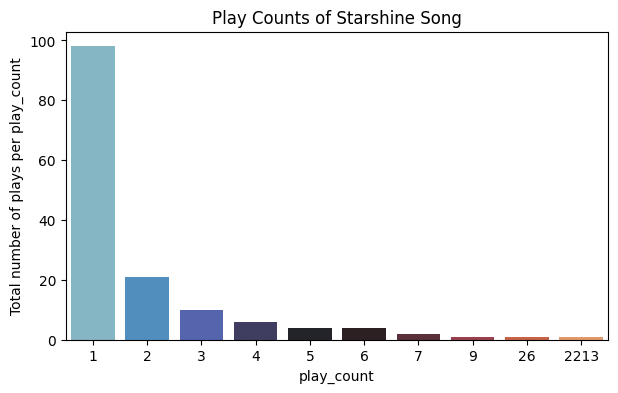

In [25]:
# Calculate the distribution of play counts for song 'Starshine'
counts_Starshine_song = df[df['title'] == 'Starshine']['play_count'].value_counts()

# Make a new dataframe for the distribution
counts_Starshine_song = pd.DataFrame(counts_Starshine_song)

# Plot the distribution of play_counts for song 'Starshine' 
plt.figure(figsize = (7, 4))
sns.barplot(x = counts_Starshine_song.index, y = 'play_count', data = counts_Starshine_song, palette = "icefire")
plt.xlabel('play_count')
plt.ylabel('Total number of plays per play_count')
plt.title('Play Counts of Starshine Song')

plt.show()

It is seen that this song is not really the most popular song among all the users. <br>

In the cell below I bar plot the most popular songs.

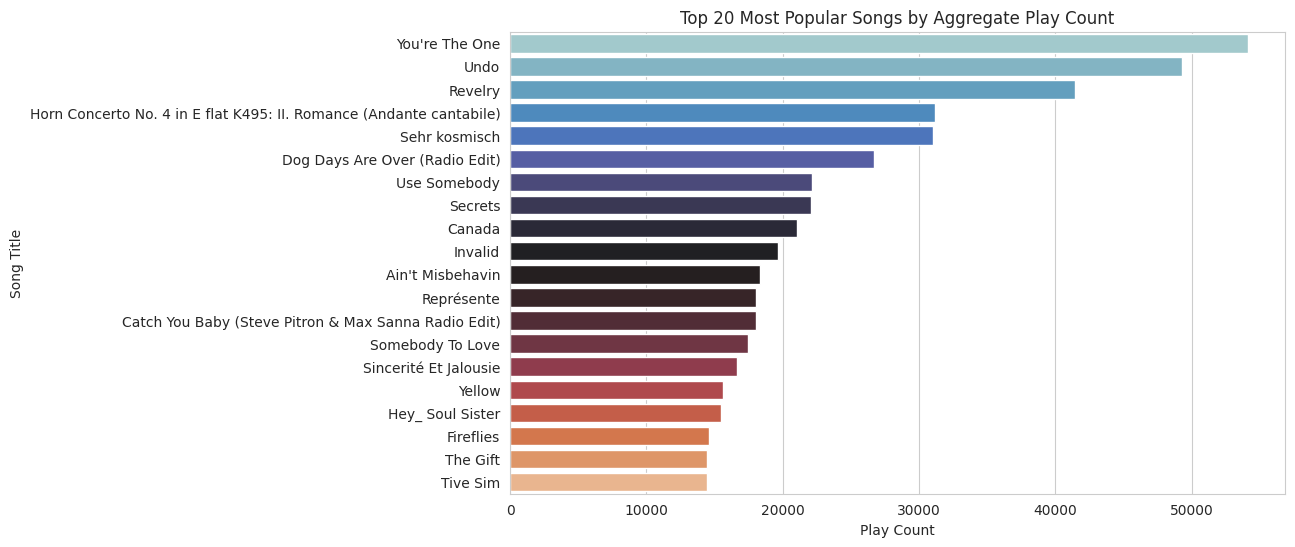

In [26]:
# Group the songs by their play count and sum the play counts
grouped_songs = df.groupby(['song_id', 'title']).agg({'play_count': 'sum'})

# Sort the songs by their aggregate play counts and get the top 20
top_20_songs = grouped_songs.sort_values(by = 'play_count', ascending = False)[:20]

# Plot the top 20 songs in a horizontal bar plot using Seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(data = top_20_songs.reset_index(), y = 'title', x = 'play_count', orient = 'h', palette = "icefire")
plt.xlabel('Play Count')
plt.ylabel('Song Title')
plt.title('Top 20 Most Popular Songs by Aggregate Play Count')
plt.show()


We see that 'You're The One' is the most popular song with aggregate play count of over 5000. Interestingly, thanks to the obsesses user, the 'Starshine' song has over 2000 play counts and sits in the 20th place. <br>

Below I plot the distribution of the play_counts for the most popular song 'You're The One'.

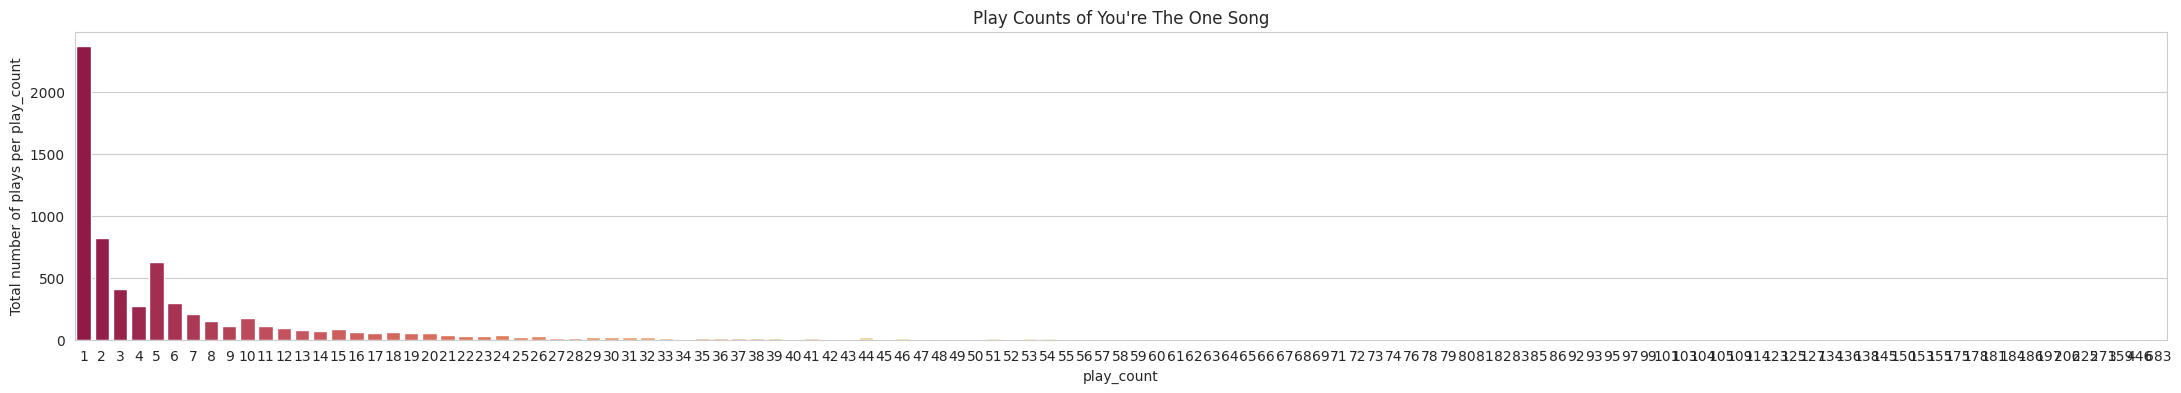

In [27]:
# Calculate the distribution of play counts for song 'Undo'
counts_Starshine_song = df[df['title'] == 'You\'re The One']['play_count'].value_counts()

# Make a new dataframe for the distribution
counts_Starshine_song = pd.DataFrame(counts_Starshine_song)

# Plot the distribution of play_counts for song 'Undo' 
plt.figure(figsize = (27, 4))
sns.barplot(x = counts_Starshine_song.index, y = 'play_count', data = counts_Starshine_song, palette = "Spectral")
plt.xlabel('play_count')
plt.ylabel('Total number of plays per play_count')
plt.title('Play Counts of You\'re The One Song')

plt.show()

Below I plot the distribution of play_count column in the dataset, to see how the number of plays are distributed.

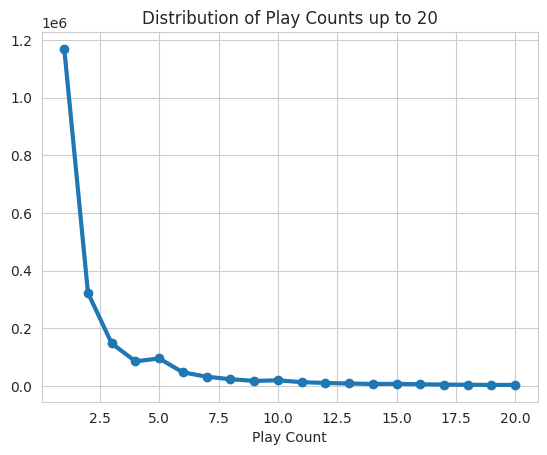

In [28]:
# Set the maximum value for the x-axis
max_value = 20

# Group the data by play_count and count the number of occurrences
grouped = df.groupby('play_count').size().reset_index(name='counts')

# Filter the data frame to include only values up to the maximum value
grouped = grouped.loc[grouped['play_count'] <= max_value]

# Create a line plot of the counts using matplotlib
plt.plot(grouped['play_count'], grouped['counts'], '-o', linewidth = 3)

plt.xlabel('Play Count')
plt.title('Distribution of Play Counts up to {}'.format(max_value))
plt.show()


It is seen that the distribution of play counts is highly skewed and more than %90 of the play counts are below 5. In other words, having a play count more than 5 is significantly unlikely. As will be shown shortly, I will trim the dataset by discarding the play counts more than 5.

As the final step regarding popularity of the songs, in the following cell I plot the distribution of top 20 songs intrracted by the obsessed user with user_id '62305'.

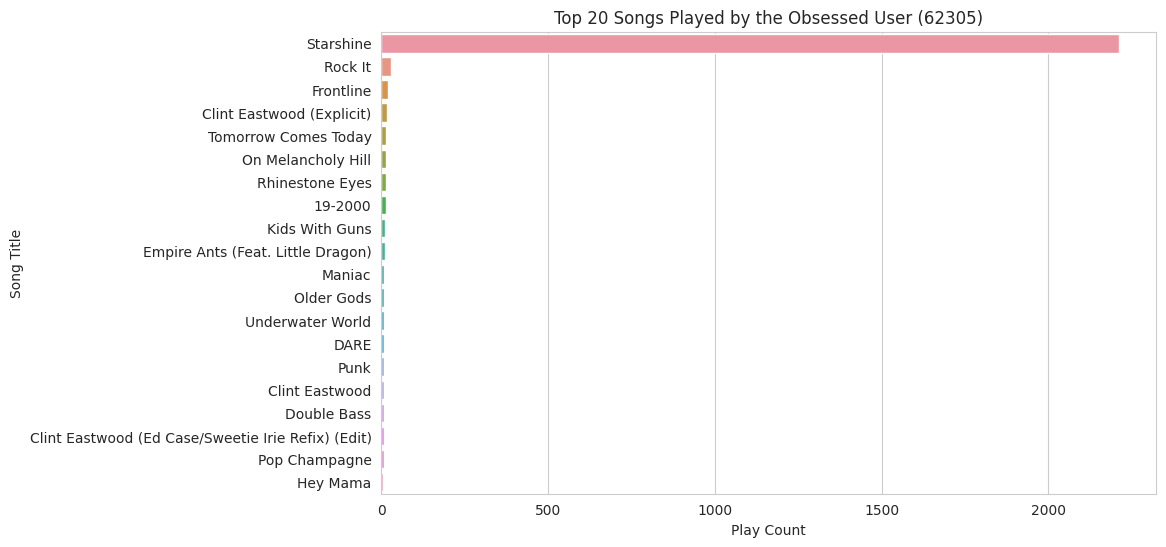

In [29]:
# Filter the DataFrame to only include play counts for obsessed user with user_id '62305'
user_plays = df.loc[df['user_id'] == 62305]

# Group the songs by their play count and sum the play counts
grouped_songs = user_plays.groupby(['song_id', 'title']).agg({'play_count': 'sum'})

# Sort the songs by their aggregate play counts and get the top 20
top_20_songs_obsessed = grouped_songs.sort_values(by='play_count', ascending=False)[:20]

# Plot the top 20 songs in a horizontal bar plot
sns.set_style('whitegrid')
sns.set_palette('husl')
plt.figure(figsize = (10, 6))
sns.barplot(data = top_20_songs_obsessed.reset_index(), y = 'title', x= 'play_count', orient='h')
plt.xlabel('Play Count')
plt.ylabel('Song Title')
plt.title('Top 20 Songs Played by the Obsessed User (62305)')
plt.show()


Based on the preious cells regarding the large standard deviation of the play counts and existance of outliers such as user 62305, the dataset should be trimmed to offer better and more meaningful statistical inference. In the following cell, I apply a threshold on the play_count column such that only users who have listened to at least 90 songs will be considered in training my model.

In [30]:
# Get the column containing the users
users = df.user_id
# Create a dictionary from users to their number of songs
user_count = dict()
for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in user_count:
        user_count[user] += 1
    # Otherwise, set their rating count to 1
    else:
        user_count[user] = 1  

# We want our users to have listened at least 90 songs
USER_CUTOFF = 90
remove_users = []
for user, num_playing in user_count.items():
    if num_playing < USER_CUTOFF:
        remove_users.append(user)

# Remove the users who listened to a songs less than USER_CUTOFF value
df = df.loc[~df.user_id.isin(remove_users)]

Furthermore, I will trim the dataset based on the number of times an individual songs have been listened. More specifically, I apply a cut off to consider songs which have been listened by at least 120 users.

In [31]:
# Get the column containing the songs
songs = df.song_id
# Create a dictionary from songs to their number of users
song_count = dict()
for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in song_count:
        song_count[song] += 1
    # Otherwise, set their rating count to 1
    else:
        song_count[song] = 1 

# We want our song to be listened by atleast 120 users to be considred
SONG_CUTOFF = 120
remove_songs = []
for song, num_ratings in song_count.items():
    if num_ratings < SONG_CUTOFF:
        remove_songs.append(song)

# Remove the songs which have been listened less than SONG_CUTOFF times
df_final= df.loc[~df.song_id.isin(remove_songs)]

Moreover, I will also remove the rows with play_counts > 5. The reason for this was explained in a few cells ago, where I plotted the distribution of play counts. It was seen that the distribution of play counts is highly skewed and it is significantly unlikely to have a song with play counts more than 5. Hence, the songs with play counts more than 5 are primarily outliers and we can drop them from the dataset. 

In [32]:
# Drop records with play_count more than (>) 5
df_final=df_final[df_final.play_count <= 5]

In [33]:
# Display the first 5 rows of new dataframe (df_final) after trimming
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
206,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
208,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
209,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
210,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
211,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


Since the indices of df_final dataset starts from 206, in the cell below I reset them to start from 0.

In [34]:
# Reset the index order of df_final dataframe
df_final = df_final.reset_index(drop = True)

After the three abovementioned trimming procedure, I check the shape of the dataset.

In [35]:
# Display the shape of the df_final dataframe
df_final.shape

(138301, 7)

In comparison with the shape of the dataset before trimming (2054534, 7), we see that the size of the dataset is quite smaller. It should be noted that in a long run, we can use the USER_CUTOFF and SONG_CUTOFF parameters as hyperparameters and see if changing these cut-off values may improve the performance of the recommendation system.

As mentioned a few times in the previous cells, the dataset had the releasing year equal to zero for some songs. After trimming the dataset, now I double check if there are still songs with releasing year equal to zero.

In [36]:
# Display the total number of songs with year = 0
(df_final.year == 0).sum()

23404

We see that ther are still 23404 songs with year = 0, which is odd and probably it was caused during data collection or no specific realsing years were denoted for these songs.

## **Exploratory Data Analysis (EDA)**

In [37]:
# Display the general information of data_final dataframe
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138301 entries, 0 to 138300
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      138301 non-null  int64 
 1   song_id      138301 non-null  int64 
 2   play_count   138301 non-null  int64 
 3   title        138301 non-null  object
 4   release      138301 non-null  object
 5   artist_name  138301 non-null  object
 6   year         138301 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 7.4+ MB


The final dataset has 7 columns and 138301 rows. Four columns contain integer type variable and three columns contain object type variables. The required memory to store the dataset is around 8.4 MB. It is also seen that there is no missing value in the final dataset.

In [38]:
# Provide summary statistics of 'play_count' variable
df_final['play_count'].describe()

count    138301.000000
mean          1.698614
std           1.088205
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           5.000000
Name: play_count, dtype: float64

The summary description of the dataset after trimming shows less standard deviation, which is a good sign for a more reliable statistical inference in our recommendation system. It should be noted that the distribution play counts in the corresponding percentiles have remained unchanged. 

In [39]:
# Display the total number of unique user_id
df_final['user_id'].nunique()

3337

We see that after merging and trimming the dataset, we have 3337 number of unique users.

In [40]:
# Display the total number of unique song_id
df_final['song_id'].nunique()

620

The total number of unique song IDs after merging and trimming the dataset is 620.

In [41]:
# Display the total number of unique artists
df_final['artist_name'].nunique()

247

It is observed that the total number of unique artists after modifying the datasets is 247.

In [42]:
# Display the total number of unique titles
df_final['title'].nunique()

629

It is observed that the total number of unique song titles is 629, which is bigger than the total number of unique song IDs. This is probably due to the existance of unique songs with multiple titles. 

**The most interacted song**

In [43]:
most_interacted = df_final.groupby(['title', 'song_id']).count()['play_count'].sort_values(ascending = False)[:10]
most_interacted

title                                              song_id
Use Somebody                                       8582       1602
Yellow                                             6293       1264
Don't Stop The Music                               4270        960
Somebody To Love                                   1286        920
Love Story                                         7796        910
Nothin' On You [feat. Bruno Mars] (Album Version)  7998        820
Dog Days Are Over (Radio Edit)                     352         802
Sehr kosmisch                                      2220        767
Clocks                                             1118        707
The Scientist                                      4152        699
Name: play_count, dtype: int64

According to the cell above, the song with the most number of interactions is the song 'Use Somebody' with ID '8582'. In the cell below, I will plot the distribution of play_counts for this song_id.

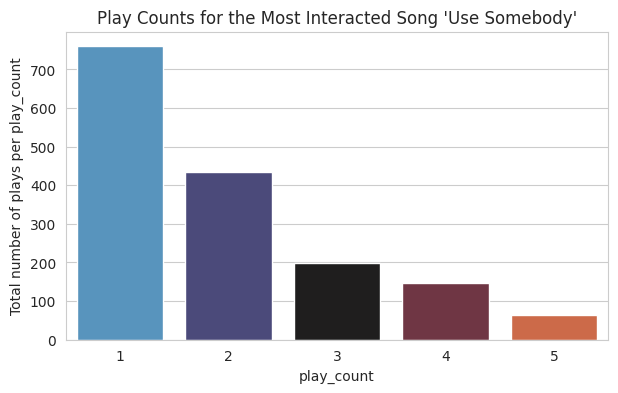

In [44]:
# Calculate the distribution of play counts for song 'Use Somebody' song_id 8582
counts_songid_8582 = df_final[df_final['song_id'] == 8582]['play_count'].value_counts()

# Make a new dataframe for the distribution
counts_songid_8582 = pd.DataFrame(counts_songid_8582)

# Plotting distributions of play counts for 1602 interactions with song_id 8582 
plt.figure(figsize = (7, 4))
sns.barplot(x = counts_songid_8582.index, y = 'play_count', data = counts_songid_8582, palette = "icefire")
plt.xlabel('play_count')
plt.ylabel('Total number of plays per play_count')
plt.title('Play Counts for the Most Interacted Song \'Use Somebody\'')

plt.show()

We see that the song with song_id 8582 has been played only once by most of the users. Hence, this song might not be the most popular song. But I leave it here and may come back to this point later.

**The most active user**

In [45]:
most_active = df_final.groupby('user_id').count()['play_count'].sort_values(ascending = False)[:10]
most_active

user_id
61472    282
15733    240
37049    237
9570     204
10763    199
23337    196
75144    194
43041    193
26616    191
9097     190
Name: play_count, dtype: int64

Based on the output of the above cell, the most active user is user_id '61472' with the total number of 282 inteactions. Below, I will plot the distribution of the user's play_counts and find this user's first 10 most popular songs.

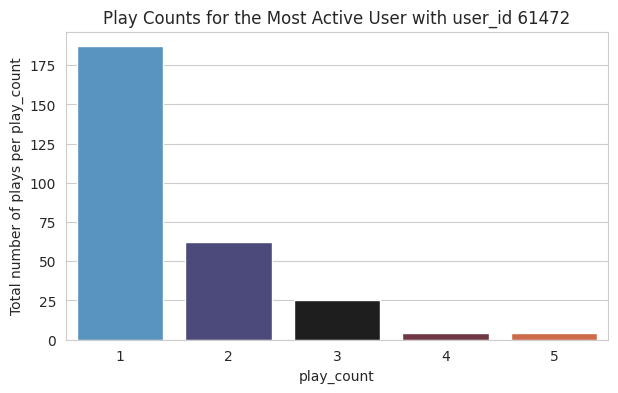

In [46]:
# Calculate the distribution of play counts for user_id 61472
counts_userid_61472 = df_final[df_final['user_id'] == 61472]['play_count'].value_counts()

# Make a new dataframe for the distribution
counts_userid_61472 = pd.DataFrame(counts_userid_61472)

# Plot the distributions of play counts 
plt.figure(figsize = (7, 4))
sns.barplot(x = counts_userid_61472.index, y = 'play_count', data = counts_userid_61472, palette = "icefire")
plt.xlabel('play_count')
plt.ylabel('Total number of plays per play_count')
plt.title('Play Counts for the Most Active User with user_id 61472')

plt.show()

In [47]:
# Display the songs with 4 or 5 play counts played by user 61472 
popular_songs_by_active_user = df_final.loc[(df_final['user_id'] == 61472) & (df_final['play_count'] > 3)]
popular_songs_by_active_user

,user_id,song_id,play_count,title,release,artist_name,year
103720,61472,22,5,Halo,Doll Domination 3.0,The Pussycat Dolls,2008
103722,61472,62,4,You And Me Jesus,Tribute To Jake Hess,Jake Hess,2004
103745,61472,788,4,S.O.S.,SOS,Jonas Brothers,2007
103746,61472,809,5,Don't Leave Me,The All-American Rejects,The All-American Rejects,2001
103748,61472,913,4,Magic,Doll Domination 3.0,The Pussycat Dolls,2008
103788,61472,2187,4,Brothers & Sisters,Trouble (B-Side),Coldplay,1999
103877,61472,5757,5,My Paper Heart,Summerland,The All-American Rejects,2003
103878,61472,5757,5,My Paper Heart,The All American Rejects,The All-American Rejects,2003


It is a useful practice to check the total number of songs played in a year. In the two following cells I find these values and produce a bar plot accordingly.

In [48]:
# Caculate the distribution of total play_counts per year
play_per_year = df_final.groupby('year').count()['play_count']
play_per_year

year
0       23404
1969      244
1970      191
1971      139
1973      426
1974      617
1975      181
1976      504
1978      307
1979      376
1980      248
1981      270
1982      131
1983      115
1986     1172
1987      354
1988      592
1990      401
1991     1616
1992     1322
1993     1266
1994      748
1995      327
1996      643
1997     1511
1999     2206
2000     6281
2001     3286
2002     5741
2003     9716
2004     2823
2005     6029
2006     9004
2007    15623
2008    16626
2009    18554
2010     5307
Name: play_count, dtype: int64

As I mentioned earlier, one odd thing about the dataset is year = 0 for a number of songs. As can be seen from the output of the cell above, songs with releasing year of 0 were played 23404 times. However, in cell below, where I plot the ditribution of play counts per year, I drop the counts for year = 0.

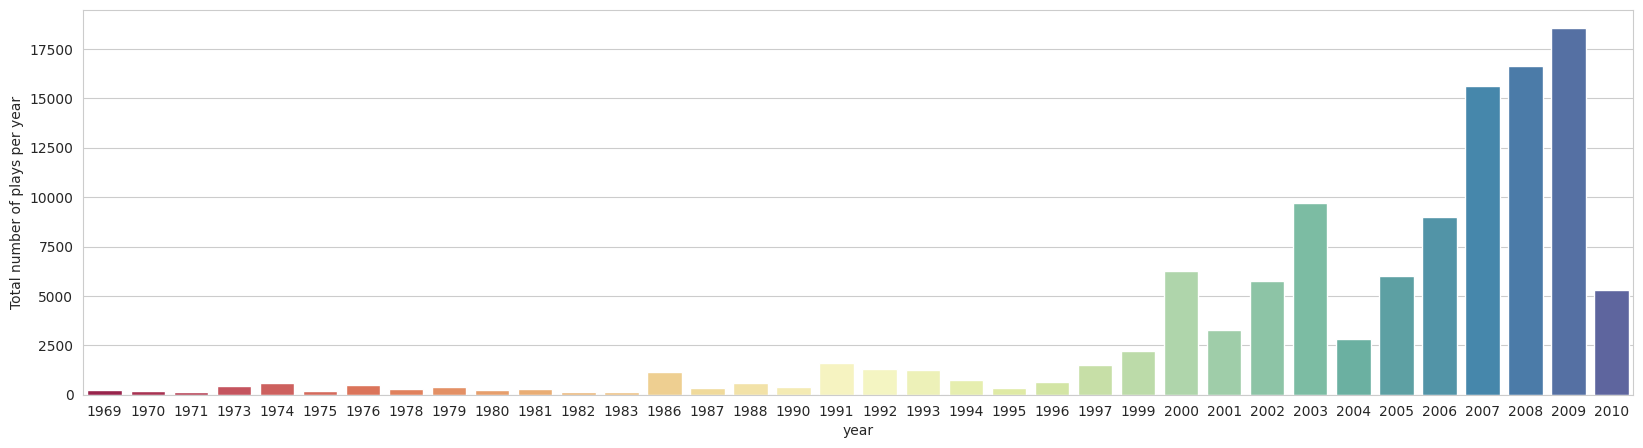

In [49]:
play_per_year = pd.DataFrame(play_per_year)
play_per_year.drop(play_per_year.index[0], inplace = True)

# Plot the distribution of play counts per year 
plt.figure(figsize = (20, 5))
sns.barplot(x = play_per_year.index, y = 'play_count', data = play_per_year, palette = "Spectral")
plt.xlabel('year')
plt.ylabel('Total number of plays per year')
plt.show()



It is observed that the iluustrated distribution is skewed towards more recent years, which makes sense. This is probably due to to two reasons. First, the more number of songs have been produced in recenet years compared to 20 years ago or earlier. Second, the users of online platforms are mostly young generations who like recent songs more than old songs.

It is also interesting to diplay the most popular artistsbased on the aggregate play counts of their songs.

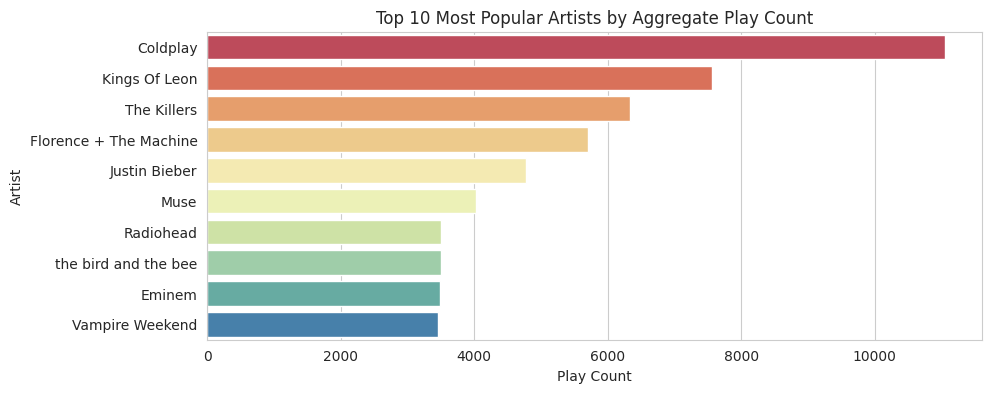

In [50]:
# Group the songs by artist and sum the play counts
grouped_artists = df_final.groupby('artist_name').agg({'play_count': 'sum'})

# Sort the artists by their aggregate play counts
sorted_artists = grouped_artists.sort_values(by='play_count', ascending=False)

# Plot the distribution of play counts for the top 10 artists
sns.set_style('whitegrid')
plt.figure(figsize=(10,4))
sns.barplot(data=sorted_artists.reset_index().head(10), y='artist_name', x='play_count', orient='h', palette = "Spectral")
plt.xlabel('Play Count')
plt.ylabel('Artist')
plt.title('Top 10 Most Popular Artists by Aggregate Play Count')
plt.show()


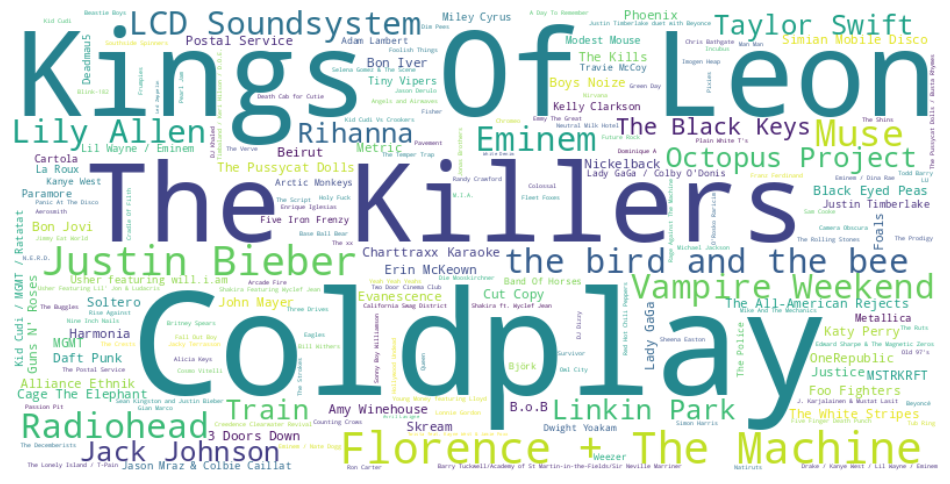

In [51]:
# Create a dictionary with artist names as keys and sum of play counts as values
artists_dict = {}
for index, row in df_final.iterrows():
    artist = row['artist_name']
    play_count = row['play_count']
    if artist in artists_dict:
        artists_dict[artist] += play_count
    else:
        artists_dict[artist] = play_count

# Generate the word cloud using WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(artists_dict)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## **Buliding Various Models** <br>
After the EDA section, now I apply various algorithms to build the recommendation system.

###**Popularity-Based Recommendation Systems**

Popularity-Based algorithm is essentially recommending the n best songs based on the average of the play counts and the frequency of playing for each song. This algorithms assumes all the users are the same and hence a new user without any prior interaction would probbaly like some or all of the suggested n best songs. This is a method to overcome the cold start problem. <br>

In the next few following cells, I first calculate the average of play counts and frequency of playing for each song. Then I define a function to apply a threshold on the minimum number of frequency and then sort the the remaining songs in a descending order. Finally, I print the top 10 recommended songs with three different frequency thresholds.

In [52]:
# Calculate average play_count
average_play_count = df_final.groupby('song_id').mean()['play_count']

# Calculate the frequency of each song
freq_song = df_final.groupby('song_id').size()

# Build the dataframe with mean and freq values
mean_freq_playcounts = pd.DataFrame({'mean': average_play_count, 'freq': freq_song})

mean_freq_playcounts.head()

,mean,freq
song_id,,
21,1.631387,274
22,1.464286,140
50,1.616822,107
52,1.715232,453
62,1.727273,121


In [53]:
def rank_recommender(data, n, min_freq):
  """
  Recommends the top n songs based on their overall populairty.
  Args:
  data: dataframe with two columns including mean and freq
  n: the number of recommended songs
  min_freq: the minimum number of interactions for a song to be considered for recommendation

  returns: a list of n top songs in descending order
  """

  # Apply a threshold to include only songs with freq higher than min_freq
  recommendation = data[data['freq'] > min_freq]

  # Sort the data based on the mean value in a descending order
  recommendation = recommendation.sort_values(by = 'mean', ascending = False)
  
  print('The top %d songs with minimum freq of %d are:' %(n, min_freq))
  return list(recommendation.index[:n])

**Top 10 song with minimum interaction of 100 based on popularity**

In [54]:
# Apply the rank_recommender function with minimum freq of 100
rank_recommender(mean_freq_playcounts, 10, 100)

The top 10 songs with minimum freq of 100 are:


[7224, 6450, 8324, 9942, 8483, 5531, 657, 5653, 614, 2220]

**Top 10 song with minimum interaction of 150 based on popularity**

In [55]:
# Apply the rank_recommender function with minimum freq of 150
rank_recommender(mean_freq_playcounts, 10, 150)

The top 10 songs with minimum freq of 150 are:


[9942, 5531, 657, 614, 2220, 352, 6860, 1664, 6246, 1334]

**Top 10 song with minimum interaction of 200 based on popularity**

In [56]:
# Apply the rank_recommender function with minimum freq of 200
rank_recommender(mean_freq_playcounts, 10, 200)

The top 10 songs with minimum freq of 200 are:


[5531, 614, 2220, 352, 1664, 6246, 1334, 4448, 8019, 7496]

### **Collaborative Filtering Method**

In the collaborative filtering method, we only consider how "similar" users interact with "similar" songs and based on that we fill the matrix of interactions for users and songs they have not interacted yet. In this project, I use four algorithms of collaborative filtering method: <br>
- user-user similarity-based algorithm
- item-item similarity-based algorithm
- matrix factorization algorithm
- cluster-based algorithm 

### **User-User similarity-based algorithm**
User-user similarity-based algorithm is a type of collaborative filtering algorithm used in recommendation systems. It is based on the idea that users who have similar preferences in the past are likely to have similar preferences in the future. The algorithm works by calculating the similarity between the target user and other users in the system, based on their past interactions with items in the system, such as songs. The algorithm then recommends items that were liked by similar users but have not been interacted with by the target user. The similarity between users can be calculated using various techniques, such as cosine similarity, Pearson correlation coefficient, or Jaccard similarity. This algorithm is particularly useful in situations where there is limited information about the items in the system, or when the user-item matrix is sparse.

**Define a function to calculate the RMSE, precision@k, recall@k, and F_1 score**

In [57]:
def precision_recall_at_k(model, test_set, k, threshold):
    """
    Calculates precision@k and recall@k metrics for each user
    
    Args:
    model: the trained recommendation model
    test_set: the test set
    k: k value for calculating the metrics
    threshold: the threshold to determine the relevant and recommended items

    returns: RMSE, precision@k, recall@k, and F_1 score
    """

    # Map the predictions to each user.
    user_est_true = defaultdict(list)
    
    # Make predictions on the test data
    predictions = model.test(test_set)
    
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    
    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    # Compute the F-1 score
    F_1 = round((2 * precision * recall) / (precision + recall), 3)
    
    RMSE = accuracy.rmse(predictions, verbose = False)

    return RMSE, precision, recall, F_1

**Convert the dataframe into a new format**<br>
Below I convert the df_final dataset, which is a pandas dataframe, into a different format called surprise.dataset.DatasetAutoFolds. This new format is required by the surprise library that I use for training recommendation system and predicting new user-song interactions. 

In [58]:
# Instantiate Reader scale with expected play_count scale
reader = Reader(rating_scale = (0, 10))

# Load the rating dataset
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)

# Split the data into train and test datasets
train_set, test_set = train_test_split(data, test_size = 0.2, random_state = 42)

**Baseline user-user similarity-based recommendation system**<br>
Now I build the  baseline user-user similarity-based recommendation system using the cosine similarity and KNNBasic algorithm which is associated with the surprise package.

In [59]:
# Declare the similarity options
sim_options = {'name': 'cosine',
               'user_based': True}

# KNN algorithm is used to find desired similar items
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

# Train the algorithm on the train set, and predict ratings for the test set
sim_user_user.fit(train_set)

# Compute RMSE, precision@k, recall@k, and F_1 score with k = 10
RMSE, precision, recall, F_1 = precision_recall_at_k(sim_user_user, test_set, 10, 1.5)

print('RMSE: ', RMSE)
print('Precision: ', precision)
print('Recall: ', recall)
print('F_1 score: ', F_1)

RMSE:  1.0638925332359763
Precision:  0.403
Recall:  0.612
F_1 score:  0.486


The output of the above cell indicates that:
- The calculated RMSE, i.e. 1.0639, indicates how far the overall predicted ratings are from the actual ratings.
- The calculated Precision shows that among all the recommended items, %40.3 are actually relevant.
- The calculated Recall demonstrates that among all the relevant products, %61.2 are recomended.
- The F_1 score indicates that in %48.6 of recommendations, the recommended items are relevant, and the relevant items are recomended.

**Predicting the play_count for a song already listened by a user (baseline model)**

In [60]:
# Predict the play count for a user 6958 who has listened to the song 1671 two times. (r_ui = 2)
sim_user_user.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.80   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.8014613092649554, details={'actual_k': 40, 'was_impossible': False})

It is observed that the estimated play_count for the interaction of user 6958 with song 1671 is quite close to the true value. 

**Predicting the play_count for a song not yet listened by a user (baseline model)**

In the cell below, I find a series of songs which have not been played by user '6958'. Then I choose a song from the obtained series to predict how many times this specific user may play.

In [61]:
series1 = df_final[df_final.user_id == 6958].song_id
dataframe1 = pd.DataFrame(series1)
song_series = (df_final[~df_final.song_id.isin(dataframe1.song_id)])
song_series.head(10)

,user_id,song_id,play_count,title,release,artist_name,year
39,27018,97,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007
40,27018,122,3,Phantom Part 1.5 (Album Version),A Cross The Universe,Justice,0
41,27018,139,1,I Got Mine,Attack & Release,The Black Keys,2008
42,27018,693,2,Us V Them,Sound Of Silver,LCD Soundsystem,2007
44,27018,765,4,Love,Attack Decay Sustain Release,Simian Mobile Disco,2007
45,27018,786,4,TTHHEE PPAARRTTYY,Justice,Justice,0
46,27018,861,1,Newjack,Justice,Justice,0
47,27018,1118,2,Clocks,A Rush Of Blood To The Head,Coldplay,2002
48,27018,1406,3,Hustler,Hustler,Simian Mobile Disco,2006
49,27018,1461,5,Arcade Robot,Oi Oi oi,Boys Noize,2007


I choose the song with song_id '861'.

In [62]:
# Predict play_count for a sample user (user_id = 6958) with a non-interacted song (song_id = 861)
sim_user_user.predict(6958, 861, verbose = True)

user: 6958       item: 861        r_ui = None   est = 1.51   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=861, r_ui=None, est=1.5069162742063547, details={'actual_k': 40, 'was_impossible': False})

It is observed that the baseline user-user similarity-based model predicts play_count of 1.51 for the interaction of user 6958 with song 861.

**Hyperparameter tuning**<br>
In the next cell, I will be tune the hyperparameters for the KNNBasic algorithms, which was one of the main building block of my user-user similarity-based recommendation system, to optimize the performance of the recommender. The parameters that I take into account are *k* the maximum number of neighbors to consider, *min_k* the minimum number of neighbors to consider, and two similarity measures including *cosine* and *mean squared difference (msd)*.

In [63]:
# Set up parameter grid to tune the hyperparameters
param_grid = {'k': [30, 40, 50], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [True]}
              }

# Performe 3-Fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fit the model on data
gs.fit(data)

# Print the best RMSE score
print(gs.best_score['rmse'])

# Print the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.014801717397858
{'k': 50, 'min_k': 9, 'sim_options': {'name': 'msd', 'user_based': True}}


The outcome of the grid search is the optimal values for each of those hyperparameters considered in the param_grid dictionary. Now, I build the optimized user-user similarity-based model to inspect if we can observe any improvement in the performance of the recommendation system.

In [64]:
# Use the optimal similarity measure for user-user collaborative filtering
sim_options = {'name': 'msd',
               'user_based': True}

# Create an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 50, min_k = 9, random_state = 1, verbose = False)

# Train the algorithm on the train set
sim_user_user_optimized.fit(train_set)

# Compute RMSE, precision@k, recall@k, and F_1 score with k = 10
RMSE, precision, recall, F_1 = precision_recall_at_k(sim_user_user_optimized, test_set, 10, 1.5)

print('RMSE: ', RMSE)
print('Precision: ', precision)
print('Recall: ', recall)
print('F_1 score: ', F_1)

RMSE:  0.9967413024828522
Precision:  0.436
Recall:  0.547
F_1 score:  0.485


It is observed that, as expected, the RMSE value has decreased compared to the baseline model. On the other hand, the Precision has increased by around %3 and Recall have dropped by around %6. In all, the F_1 score has dropped by %0.1, which is negligible. Thus, the hyperparameter tunning did not lead to a significant change in the performance of the baseline user-user similarity-based recommendation system. For future steps, I may include other hyperparameters and a broader range of values, although it will increase the computational time.


**Predicting the play_count for a song already listened by a user (optimized model)**

In [65]:
# Predict the play count for a user 6958 who has listened to the song 1671 two times. (r_ui = 2)
sim_user_user_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.58   {'actual_k': 50, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.5763619352362142, details={'actual_k': 50, 'was_impossible': False})

It is seen that the tuned model estimates a lower play_count compared to the baseline model.

**Predicting the play_count for a song not yet listened by a user (optimized model)**

In [66]:
# Predict play_count for a sample user (user_id = 6958) with a non-interacted song (song_id = 861)
sim_user_user_optimized.predict(6958, 861, verbose = True)

user: 6958       item: 861        r_ui = None   est = 1.56   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=861, r_ui=None, est=1.556747519311932, details={'actual_k': 40, 'was_impossible': False})

It is seen that the tuned model estimates a slightly higher play_count compared to the baseline model.

**Finding similar users to a user**<br>
Below, I use the 'get_neighbor' method to find 5 users similar to user with inner id '0'. It should be noted that as I use the tuned model in the cell below, the measure of similarity to find the 5 similar users is 'msd'.

In [67]:
# Find 5 similar users to user with inner id '0'
sim_user_user_optimized.get_neighbors(0, k = 5)

[6, 9, 10, 11, 14]

**Making a list of recommendations for a user**<br>
First, I define a function to create a list of songs to recommend to a specific user, who has not interacted with those songs.

In [68]:
def get_recommendations(data, user_id, top_n, algo):
    
    # Create an empty list to store the recommended product ids
    recommendations = []
    
    # Create a user-item interactions matrix
    user_item_interactions_matrix = data.pivot_table(index = 'user_id', columns = 'song_id', values = 'play_count', aggfunc = 'first')
    
    # Extract the row of the user_id in the user-item interactions matrix
    user_row = user_item_interactions_matrix.loc[user_id]

    # Extract those song_ids which the user_id has not interacted with yet
    new_song_ids = user_row[~user_row.notnull()].index.tolist()
    
    # Looping through each of the business ids which user_id has not interacted yet
    for item in new_song_ids:
      
      # Predict the play counts for those non-interacted song ids by this user
      pred_play_count = algo.predict(user_id, item).est
      
      # Append the predicted ratings
      recommendations.append((item, pred_play_count))
      
    # Sort the predicted ratings in descending order
    recommendations = sorted(recommendations, key = lambda x: x[1], reverse = True)

    # Returing top n highest predicted rating products for this user
    return recommendations[:top_n]

Then I call the above function to apply my tuned user-user similarity-based model on our dataset, i.e. df_final, for user_id '6958' and obtain the top 5 new recommended songs for this user. 

In [69]:
#  Make top 5 recommendations for userId 6958 using the optimized user-user similarity-based recommendation system
recommendations = get_recommendations(df_final, 6958, 5, sim_user_user_optimized)

In [70]:
# Make a dataframe with the recommended song_ids and predicted play counts
pd.DataFrame({'song_id': list(zip(*recommendations))[0], 'pred_play_count': list(zip(*recommendations))[1]})

,song_id,pred_play_count
0,7224,3.093191
1,6450,2.766115
2,657,2.616890
3,352,2.600000
4,5653,2.385661


While comparing the play_counts of two songs, it is not only the play_counts that describe the likelihood of the user to interact with that song. Along with the play_count, the number of users who have listened to that song also becomes important to consider. Due to this, in the cell belwo I calculate the "corrected_play_count" for each song. Generally, the higher the "play_count" of a song, the more reliable the rating is. It has been empirically found that the likelihood of the song is directly proportional to the inverse of the square root of the play_count of the song.

**Correcting the play counts and ranking of the recommended songs**

In [71]:
def ranking_songs(recommendations, data):

  # Sort the songs based on play count
  ranked_songs = data.loc[[items[0] for items in recommendations]].sort_values('freq', ascending = False)[['freq']].reset_index()

  # Merge with the recommended songs to get predicted play counts
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'pred_play_count']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play counts
  ranked_songs['corrected_play_counts'] = ranked_songs['pred_play_count'] - 1 / np.sqrt(ranked_songs['freq'])

  # Sort the songs based on corrected play counts
  ranked_songs = ranked_songs.sort_values('corrected_play_counts', ascending = False)
  
  return ranked_songs

Now I call the above function to correct the ranking and play counts of the recommended songs to user_id '6958'. It should be noted that for the second argument of the correcting function, I use mean_freq_playcounts dataframe, which was obtained in the popularity-based recommendation system section.

In [72]:
# Apply the ranking song function and sorting it based on corrected play counts
ranking_songs(recommendations, mean_freq_playcounts)

,song_id,freq,pred_play_count,corrected_play_counts
4,7224,109,3.093191,2.997408
2,6450,110,2.766115,2.670769
0,352,802,2.600000,2.564689
1,657,159,2.616890,2.537585
3,5653,110,2.385661,2.290315


It is observed that compared to the earlier step, in the new recommendation list, the ranking of song_id 352 and 657 have been exchnaged. Moreover, the corrected_play_counts are slightly lower compared to the earlier step.

### **Item-Item similarity-based algorithm**
An item-item similarity-based recommendation system is a type of collaborative filtering system used to suggest items to users based on their similarities to other items. The system computes the similarity between different items based on the rating patterns of users who have rated both items. It then recommends items that are similar to the ones the user has already rated positively. This approach is particularly useful when there is a large number of items and users, as it can efficiently compute the similarity between items, even when the number of users is relatively small. Additionally, the item-item similarity-based approach is often more effective than other recommendation approaches, as it can provide recommendations for new or rare items, for which there is little or no user data available.

**Baseline item-item similarity-based recommendation system**<br>
Now I build the baseline item-item similarity-based recommendation system using the cosine similarity and KNNBasic algorithm.

In [73]:
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# The KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the train set, and predict ratings for the testset
sim_item_item.fit(train_set)

# Compute RMSE, precision@k, recall@k, and f_1 score with k = 10
RMSE, precision, recall, F_1 = precision_recall_at_k(sim_item_item, test_set, 10, 1.5)

print('RMSE: ', RMSE)
print('Precision: ', precision)
print('Recall: ', recall)
print('F_1 score: ', F_1)

RMSE:  1.0154051039957583
Precision:  0.32
Recall:  0.512
F_1 score:  0.394


The output of the above cell indicates that:

- The calculated RMSE is 1.0154 which is lower compared to that of the user-user similarity-based model.
- The calculated Precision is %32 which is 8% lower compared to that of the user-user similarity-based model. 
- The calculated Recall is %51.2 which is %10 lower compared to that of the user-user similarity-based model. 
- The calculated F_1 score is %39.4, which is around %9 lower compared to that of the user-user similarity-based model. 

**Predicting the play_count for a song already listened by a user (baseline model)**

In [74]:
# Predict play count for a sample user_id 6958 and song (with song_id 1671) heard by the user
sim_item_item.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.45   {'actual_k': 28, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.4532417431228544, details={'actual_k': 28, 'was_impossible': False})

It is observed that the estimated play_count for the interaction of user 6958 with song 1671 is 1.45 which is smaller compared to what predicted by the user-user similarity-based model.

**Predicting the play_count for a song not yet listened by a user (baseline model)**

In [75]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict(6958, 861, verbose = True)

user: 6958       item: 861        r_ui = None   est = 1.44   {'actual_k': 28, 'was_impossible': False}


Prediction(uid=6958, iid=861, r_ui=None, est=1.4401389776646178, details={'actual_k': 28, 'was_impossible': False})

It is observed that the baseline item-item similarity-based model predicts play_count of 1.44 for the interaction of user 6958 with song 861.

**Hyperparameter tuning**<br>
In the next cell, similar to the user-user similarity-based model, I will tune the hyperparameters for the KNNBasic algorithms to obtain the optimal parameters for a better prediction performance.

In [76]:
# Set up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [False]}
              }

# Perform 3-Fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fit the model on the data
gs.fit(data)

# Print the best RMSE score
print(gs.best_score['rmse'])

# Print the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0158203203455205
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'msd', 'user_based': False}}


The outcome of the grid search is the optimal values for each of those hyperparameters considered in the param_grid dictionary. Now, I build the optimized item-item similarity-based model to inspect if we can observe any improvement in the performance of the recommendation system.

In [77]:
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'msd',
               'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 6, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_item_item_optimized.fit(train_set)

# Compute RMSE, precision@k, recall@k, and f_1 score with k = 10
RMSE, precision, recall, F_1 = precision_recall_at_k(sim_item_item_optimized, test_set, 10, 1.5)

print('RMSE: ', RMSE)
print('Precision: ', precision)
print('Recall: ', recall)
print('F_1 score: ', F_1)

RMSE:  1.008115412723575
Precision:  0.344
Recall:  0.498
F_1 score:  0.407


It is observed that the RMSE value has slightly decreased compared to the baseline model. On the other hand, the Precision has increased by around %2.4 and Recall have dropped by around %1.2. In all, the F_1 score has slightly improved by around %1.3.

**Predicting the play_count for a song already listened by a user (optimized model)**

In [78]:
# Predict play count for a sample user_id 6958 and song (with song_id 1671) heard by the user
sim_item_item_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.40   {'actual_k': 28, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.4042290129215511, details={'actual_k': 28, 'was_impossible': False})

It is seen that the tuned model estimates a slightly lower play_count compared to the baseline model.

**Predicting the play_count for a song not yet listened by a user (optimized model)**

In [79]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item_optimized.predict(6958, 861, verbose = True)

user: 6958       item: 861        r_ui = None   est = 1.40   {'actual_k': 28, 'was_impossible': False}


Prediction(uid=6958, iid=861, r_ui=None, est=1.3956617951785566, details={'actual_k': 28, 'was_impossible': False})

It is seen that the tuned model estimates a slightly lower play_count compared to the baseline model.

**Finding similar songs to a song**<br>
Below, I find 5 song similar to song with inner id '0'. It should be noted that as I use the tuned model in the cell below, the measure of similarity to find the 5 similar users is 'msd'.

In [80]:
# Find five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0, k = 5)

[29, 39, 52, 59, 65]

**Making a list of recommendations for a user**<br>
I call the 'get_recommendations' function to apply my tuned item-item similarity-based model on our dataset, i.e. df_final, for user_id '6958' and obtain the top 5 new recommended songs for this user.

In [81]:
# Make top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_item_item_optimized)

In [82]:
# Build the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame({'song_id': list(zip(*recommendations))[0], 'pred_play_count': list(zip(*recommendations))[1]})

,song_id,pred_play_count
0,9942,1.949145
1,3564,1.901977
2,4631,1.854962
3,4831,1.819749
4,5417,1.771872


Now I call the 'ranking_songs' function to correct the ranking and play counts of the recommended songs to user_id '6958'.

In [83]:
# Apply the ranking_songs function
ranking_songs(recommendations, mean_freq_playcounts)

,song_id,freq,pred_play_count,corrected_play_counts
1,9942,159,1.949145,1.869840
0,3564,193,1.901977,1.829996
3,4631,123,1.854962,1.764795
4,4831,98,1.819749,1.718734
2,5417,137,1.771872,1.686436


It is observed that compared to the earlier step, in the new recommendation list, the ranking of songs have remained unchanged. However, the corrected_play_counts are slightly lower compared to the earlier step. Moreover, the suggested new songs are completely different compared to the songs suggested by the user-user similarity-based model. 

### **Model Based Collaborative Filtering - Matrix Factorization**
Matrix factorization algorithm is a popular approach in building recommendation systems. It involves representing the users and items as vectors in a lower dimensional space, where the dot product of these vectors represents the predicted rating for that user-item combination. The algorithm works by factorizing a user-item rating matrix into two lower dimension matrices: a user-factor matrix and an item-factor matrix. The user-factor matrix contains the latent factors that describe the characteristics of the users, while the item-factor matrix contains the latent factors that describe the characteristics of the items. These matrices are iteratively updated using gradient descent or alternate least squares to minimize the difference between the predicted and actual ratings. Once the matrices have been trained, the dot product of the corresponding user and item vectors can be used to generate recommendations for the user. The matrix factorization algorithm has proven to be an effective method for building recommendation systems, particularly in cases where the number of users and items is large, and the ratings matrix is sparse.

**Baseline matrix factorization recommendation system**<br>
Now I build the baseline matrix factorization recommendation system using the singular value decomposition (svd) method.

In [84]:
# Build baseline model using svd
svd = SVD(random_state = 1)

# Train the algorithm on the training dataset
svd.fit(train_set)

# Compute RMSE, precision@k, recall@k, and f_1 score with k = 10
RMSE, precision, recall, F_1 = precision_recall_at_k(svd, test_set, 10, 1.5)

print('RMSE: ', RMSE)
print('Precision: ', precision)
print('Recall: ', recall)
print('F_1 score: ', F_1)

RMSE:  0.9767100501891904
Precision:  0.425
Recall:  0.584
F_1 score:  0.492


The output of the above cell indicates that:

- The calculated RMSE is 0.9767.
- The calculated Precision is %42.5. 
- The calculated Recall is %58.4. 
- The calculated F_1 score is %49.2.

**Predicting the play_count for a song already listened by a user (baseline model)**

In [85]:
# Make prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3645203658652842, details={'was_impossible': False})

It is observed that the estimated play_count for the interaction of user 6958 with song 1671 is 1.36 which is smaller compared to what predicted by the user-user and item-item similarity-based model.

**Predicting the play_count for a song not yet listened by a user (baseline model)**

In [86]:
# Make a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(6958, 861, verbose = True)

user: 6958       item: 861        r_ui = None   est = 1.28   {'was_impossible': False}


Prediction(uid=6958, iid=861, r_ui=None, est=1.2832808587277669, details={'was_impossible': False})

It is observed that the baseline SVD model predicts play_count of 1.28 for the interaction of user 6958 with song 861.


**Hyperparameter tuning**<br>
In the next cell, I will tune the hyperparameters for the svd algorithms to obtain the optimal parameters for a better prediction performance. For this purpose I will use the following parameters:
- *n_epochs*: The number of iterations of the SVD algorithm.
- *lr_all*: The learning rate for all the parameters.
- *reg_all*: The regularization term for all the parameters.

In [87]:
# Set the parameter space to do hyperparameter tuning
param_grid = {'n_epochs': [10, 20, 30, 100], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.01, 0.1, 0.2, 0.4]}

# Performing 3-Fold gridsearch cross-validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the model on the data
gs.fit(data)

# Print the best RMSE score
print(gs.best_score['rmse'])

# Print the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9736861740496567
{'n_epochs': 100, 'lr_all': 0.01, 'reg_all': 0.1}


The outcome of the grid search is the optimal values for each of those hyperparameters considered in the param_grid dictionary. Now, I build the optimized SVD model to inspect if we can observe any improvement in the performance of the recommendation system.

In [88]:
# Build the optimized SVD model using optimal hyperparameters search
svd_optimized = SVD(n_epochs = 100, lr_all = 0.005, reg_all = 0.1, random_state = 1)

# Train the algorithm on the train set
svd_optimized = svd_optimized.fit(train_set)

# Compute precision@k, recall@k, and f_1 score with k = 10
RMSE, precision, recall, F_1 = precision_recall_at_k(svd_optimized, test_set, 10, 1.5)

print('RMSE: ', RMSE)
print('Precision: ', precision)
print('Recall: ', recall)
print('F_1 score: ', F_1)

RMSE:  0.9595114957546368
Precision:  0.443
Recall:  0.589
F_1 score:  0.506


It is observed that the RMSE value has decreased by %1.72 compared to the baseline model. On the other hand, the Precision has increased by around %1.53 and the Recall has reduced by around %0.5, respectively. In all, the F_1 score has increased by around %1.4.<br>
It should be noted that there are many hyperparameters to tune the SVD model. As a next step, I may increase the diversity of the parameters and broaden the range of values to see if improvement can be observed in the performance of the SVD system.

**Predicting the play_count for a song already listened by a user (tuned model)**

In [89]:
# Make prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.47   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.4672651098247027, details={'was_impossible': False})

It is observed that the estimated play_count for the interaction of user 6958 with song 1671 is 1.47, which is slightly higher than that of the baseline model.

**Predicting the play_count for a song not yet listened by a user (baseline model)**

In [90]:
# Make a prediction for the user who has not listened to the song (song_id 3232)
svd_optimized.predict(6958, 861, verbose = True)

user: 6958       item: 861        r_ui = None   est = 1.53   {'was_impossible': False}


Prediction(uid=6958, iid=861, r_ui=None, est=1.5320854183726782, details={'was_impossible': False})

It is observed that the tuned SVD model predicts play_count of 1.53 for the interaction of user 6958 with song 861.

**Making a list of recommendations for a user**<br>
Below, I call the 'get_recommendations' function to apply my tuned SVD model on our dataset, i.e. df_final, for user_id '6958' and obtain the top 5 new recommended songs for this user.

In [91]:
# Get top 5 recommendations for userId 6958 using "svd_algo_optimized" algorithm
svd_recommendations = get_recommendations(df_final, 6958, 5, svd_optimized)

In [92]:
# Build the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame({'song_id': list(zip(*svd_recommendations))[0], 'pred_play_count': list(zip(*svd_recommendations))[1]})

,song_id,pred_play_count
0,2914,2.762947
1,4831,2.746642
2,7224,2.562900
3,6084,2.556641
4,6450,2.513202


Now I call the 'ranking_songs' function to correct the ranking and play counts of the recommended songs to user_id '6958'.

In [93]:
ranking_songs(svd_recommendations, mean_freq_playcounts)

,song_id,freq,pred_play_count,corrected_play_counts
1,2914,116,2.762947,2.670099
4,4831,98,2.746642,2.645627
3,7224,109,2.562900,2.467117
0,6084,122,2.556641,2.466105
2,6450,110,2.513202,2.417856


It is observed that compared to the earlier step, in the new recommendation list, the ranking of songs have remained unchanged. However, the corrected_play_counts are slightly lower compared to the earlier step. Moreover, the two of the suggested new songs are among those suggested by the user-user similarity-based model. The '4831' song is also common btween SVD suggestions and item-item similarity-based model suggestions.

### **Cluster Based Recommendation System**
Cluster-based algorithms are a popular approach in recommendation systems, which aim to suggest relevant items to users based on their past behavior or preferences. These algorithms group users and items into clusters based on similarities in their attributes, such as interests, demographics, or purchase history. Then, they recommend items that are popular or well-rated among users in the same cluster or similar clusters. This approach can improve the quality of recommendations by leveraging the collective behavior of users within clusters, and it can also help overcome the cold start problem, where new users or items have insufficient data for personalized recommendations. However, cluster-based algorithms require a sufficient amount of data and may face challenges in dealing with dynamic or diverse user preferences. <br>

**Baseline Cluster-based recommendation system**<br>
Now I build the baseline cluster-based recommendation system using the using the method of CoClustering of surperise library.

In [94]:
# Use CoClustering algorithm
clust_baseline = CoClustering(random_state = 1)

# Train the algorithm on the train set
clust_baseline.fit(train_set)

# Compute precision@k, recall@k, and F_1 score with k = 10
RMSE, precision, recall, F_1 = precision_recall_at_k(clust_baseline, test_set, 10, 1.5)

print('RMSE: ', RMSE)
print('Precision: ', precision)
print('Recall: ', recall)
print('F_1 score: ', F_1)

RMSE:  1.0254331059589206
Precision:  0.379
Recall:  0.519
F_1 score:  0.438


The output of the above cell indicates that:

- The calculated RMSE is 1.0254.
- The calculated Precision is %37.9. 
- The calculated Recall is %51.9. 
- The calculated F_1 score is %43.8.

**Predicting the play_count for a song already listened by a user (baseline model)**

In [95]:
# Make prediction for user_id 6958 and song_id 1671
clust_baseline.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 0.98   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=0.9787337306503692, details={'was_impossible': False})

It is observed that the estimated play_count for the interaction of user 6958 with song 1671 is 0.98 which is the smallest compared to what predicted by the previous models.

**Predicting the play_count for a song not yet listened by a user (baseline model)**

In [96]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user
clust_baseline.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.66   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6626966619588004, details={'was_impossible': False})

It is observed that the baseline SVD model predicts play_count of 1.66 for the interaction of user 6958 with song 861.

**Hyperparameter tuning**<br>
In the next cell, I will tune the hyperparameters for the svd algorithms to obtain the optimal parameters for a better prediction performance. For this purpose I will use the following parameters:
- *n_cltr_u*: Number of user clusters. The default value is 3.
- *n_cltr_i*: Number of item clusters. The default value is 3.
- *n_epochs*: Number of iteration of the optimization loop. The default value is 3.

In [97]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [3, 4, 5, 6], 'n_cltr_i': [3, 4, 5, 6], 'n_epochs': [30, 40, 50]}

# Performe 3-Fold gridsearch cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fit data
gs.fit(data)

# Print the best RMSE score
print(gs.best_score['rmse'])

# Print the combination of parameters that gives the best RMSE score
print(gs.best_params['rmse'])

1.0356490352206442
{'n_cltr_u': 3, 'n_cltr_i': 4, 'n_epochs': 40}


In [98]:
# Use CoClustering algorithm
clust_optimized = CoClustering(n_cltr_u = 3, n_cltr_i = 3, n_epochs = 30, random_state = 1)

# Train the algorithm on the train set
clust_optimized.fit(train_set)

# Compute precision@k, recall@k, and F_1 score with k = 10
RMSE, precision, recall, F_1 = precision_recall_at_k(clust_optimized, test_set, 10, 1.5)

print('RMSE: ', RMSE)
print('Precision: ', precision)
print('Recall: ', recall)
print('F_1 score: ', F_1)

RMSE:  1.0254331059589206
Precision:  0.379
Recall:  0.519
F_1 score:  0.438


The outcome of the grid search is the optimal values for each of those hyperparameters considered in the param_grid dictionary. Now, I build the optimized cluster-based model to inspect if we can observe any improvement in the performance of the recommendation system.

**Predicting the play_count for a song already listened by a user (tuned model)**

In [99]:
# Make prediction for user_id 6958 and song_id 1671
clust_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 0.98   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=0.9787337306503692, details={'was_impossible': False})

It is observed that the estimated play_count for the interaction of user 6958 with song 1671 is 0.98, which is similar to that of the baseline model.

**Predicting the play_count for a song not yet listened by a user (baseline model)**

In [100]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user
clust_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.66   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6626966619588004, details={'was_impossible': False})

It is observed that the tuned cluster-based model predicts play_count of 1.66 for the interaction of user 6958 with song 861.

**Making a list of recommendations for a user**<br>
Below, I call the 'get_recommendations' function to apply my tuned cluster-based model on our dataset, i.e. df_final, for user_id '6958' and obtain the top 5 new recommended songs for this user.

In [101]:
# Get top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
clust_recommendations = get_recommendations(df_final, 6958, 5, clust_optimized)

In [102]:
# Build the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame({'song_id': list(zip(*clust_recommendations))[0], 'pred_play_count': list(zip(*clust_recommendations))[1]})

,song_id,pred_play_count
0,7224,3.355299
1,6450,2.696785
2,8324,2.445314
3,5653,2.320816
4,614,2.290608


Now I call the 'ranking_songs' function to correct the ranking and play counts of the recommended songs to user_id '6958'.

In [103]:
# Ranking songs based on the above recommendations
ranking_songs(clust_recommendations, mean_freq_playcounts)

,song_id,freq,pred_play_count,corrected_play_counts
3,7224,109,3.355299,3.259516
1,6450,110,2.696785,2.601439
4,8324,103,2.445314,2.346781
0,614,401,2.290608,2.240670
2,5653,110,2.320816,2.225470


It is observed that compared to the earlier step, in the new recommendation list, the ranking of last two songs have exchanged and the corrected_play_counts are slightly lower compared to the earlier step. Moreover, the three of the suggested new songs are among those suggested by the user-user similarity-based model. 

### **Iterative Singular Value Thresholding**

In this section, I utilize the iterative singular value thresholding (IST) algorithm to improve the performance of the recommender system. IST is a matrix factorization technique that addresses the problem of missing values in the dataset by decomposing the original rating matrix into low-rank matrices. The algorithm iteratively updates the factorized matrices using a thresholding operator that induces sparsity in the matrix. This sparsity reduces the computational complexity of the matrix factorization process and improves the accuracy of the recommendations, especially in large, sparse datasets. IST has proven to be effective in building recommender systems and is widely used in various applications, including e-commerce, social networks, and online advertising.

**Defining Several Functions**

The '*truncate_list*' function that I defined below sorts the singular values of the interaction matrix and applies a threshold to them. It takes a list containing all the singular values of the matrix as input and truncates the list so that the squared sum of the remaining singular values, or 'power', contributes to at least 90% of the total squared sum of the original list.

In [104]:
def truncate_list(lst, threshold_ratio = 0.9):
    """
    Truncates a list of numerical values by retaining the elements whose
    squared sum contributes to at least a specified fraction (%90 by default) of 
    the total squared sum of the original list.

    Args:
        lst: A list of numerical values in descending order.
        threshold_ratio: A float between 0 and 1, indicating the fraction of
            total squared sum that should be retained. Default is 0.9.

    Returns:
        A truncated list of elements that contribute to at least the specified
        fraction of the total squared sum.
    """
    squared_sum = sum(x**2 for x in lst)
    threshold = squared_sum * threshold_ratio
    cum_sum = 0
    for i, x in enumerate(lst):
        cum_sum += x**2
        if cum_sum >= threshold:
            return lst[:i+1]
        
    # return the original list if threshold is not reached
    return lst

The purpose of the '*find_nan_indices*' function, that I defined in the cell below, is to find the indices of NaN values in the DataFrame and return them as a list of tuples.

In [105]:
def find_nan_indices(df):
    """
    This function takes a Pandas DataFrame and returns a list of tuples containing
    the row and column indices of NaN values, as well as a 0 for the third element.
    """
    nan_mask = df.isnull().values
    nan_indices = np.argwhere(nan_mask)
    nan_tuples = list(zip(df.index[nan_indices[:,0]], df.columns[nan_indices[:,1]], np.zeros(nan_indices.shape[0])))
    return nan_tuples

In the cell below, I define a function named '*make_missing*' that takes a Pandas DataFrame and a ratio as arguments. The purpose of this function is to replace a specified percentage of non-missing values in the DataFrame with NaN to create a simulated test set.

In [106]:
def make_missing(df, ratio):
    """
    Replace a specified percentage of non-missing values in a DataFrame with NaN
    to be Used as the test set.

    Args:
    df (pandas.DataFrame): DataFrame with missing values.
    ratio (float): Ratio of non-missing values to replace with NaN. Default value is 0.1.

    Returns:
    pandas.DataFrame: DataFrame with missing values and a specified percentage of non-missing
                      values replaced with NaN.
    list: A list of tuples representing the indices of the non-missing values that were replaced with NaN.
    """
    # Convert the DataFrame to a numpy array
    matrix = df.to_numpy()

    # Find the indices of the non-missing values
    indices = np.where(~np.isnan(matrix))

    # Compute the number of non-missing values
    num_values = len(indices[0])

    # Shuffle the indices
    shuffled_indices = np.random.permutation(num_values)

    # Compute the number of non-missing values to replace with NaN
    num_replace = int(num_values * ratio)

    # Replace the specified number of non-missing values with NaN
    replace_indices = shuffled_indices[:num_replace]
    new_matrix = matrix.copy()
    replace_list = [(indices[0][i], indices[1][i]) for i in replace_indices]
    new_matrix[indices[0][replace_indices], indices[1][replace_indices]] = np.nan

    # Convert the modified numpy array back to a DataFrame with the same shape
    new_df = pd.DataFrame(new_matrix, columns=df.columns, index=df.index)
    
    return new_df, replace_list

**IST Implementation**<br>
The "*ist*" function is created in this code to fill in missing values in a matrix using the Iterative Singular Value Thresholding (IST) algorithm. The algorithm first fills the incomplete matrix with an initialized matrix or zeros. For this recommender system, the initialized matrix is produced using the user-user similarity-based model. The "*ist*" function then updates the initially completed matrix iteratively by performing SVD on the incomplete matrix, thresholding the singular values, and reconstructing the matrix with the thresholded singular values. The function checks for convergence by comparing the Frobenius norm of the difference between the completed and the updated matrices to the specified tolerance level. When the change in the matrix falls below the specified tolerance level, the iteration stops.

In [107]:
def ist(matrix, mask, init_matrix=None, max_iter=1000, tol=1e-5):
  
    """Iterative Singular Value Thresholding (IST) algorithm to fill in missing entries of a matrix
    
    Parameters:
    matrix (np.ndarray): The incomplete matrix with missing values
    mask (np.ndarray): A binary mask indicating the missing entries of the matrix
    alpha (float): The thresholding parameter, which should be adjusted based on the fraction of non-missing values
    init_fun (function): The initialization function to fill in the missing values of the incomplete matrix (default: None)
    max_iter (int): The maximum number of iterations to perform (default: 1000)
    tol (float): The tolerance level to stop iterations when the change in the matrix is below this value (default: 1e-5)
    
    Returns:
    np.ndarray: The completed matrix
    """
        
    # Fill in the incomplete matrix with the initialized matrix, otherwise with zeros
    if init_matrix is not None:
        matrix_init = init_matrix
    else:
        matrix_init = np.zeros_like(matrix)
    
    # Initialize the completed matrix as a copy of the initialized matrix
    matrix_completed = matrix_init.copy()
    
    
    # Iteratively update the matrix until convergence or max_iter is reached
    for i in tqdm(range(max_iter)):
        
        # Compute the SVD of the incomplete matrix
        U, s, Vt = np.linalg.svd(matrix_init, full_matrices=False)
        
        # Threshold the singular values
        s_thresh = truncate_list(s, threshold_ratio = 0.9)
        r = len(s_thresh)

        # Truncate matrices U and V accordingly
        U_thresh = U[:, :r]
        Vt_thresh = Vt[:r, :]
                
        # Reconstruct the matrix with the thresholded singular values
        matrix_new = np.dot(U_thresh, np.dot(np.diag(s_thresh), Vt_thresh))
        
        # Update the completed matrix with the reconstructed values
        matrix_completed[mask] = matrix_new[mask]
        
        # Check for convergence
        if np.linalg.norm(matrix_completed - matrix_new) < tol:
            break
                
        # Update the incomplete matrix with the completed values
        matrix_init[mask] = matrix_completed[mask]
    
    return matrix_completed

**Building User-Item Matrix of Interaction**<br>
In the following cell, I create a user-item interaction matrix using the df_final dataset. The rows of the matrix correspond to each user, and the columns correspond to each song. Each element of the matrix represents the number of interactions between a specific user and a specific song.

In [108]:
# Create a user-item interactions matrix
user_item_interactions_matrix = df_final.pivot_table(index = 'user_id', columns = 'song_id', values = 'play_count', aggfunc = 'first')

In [109]:
user_item_interactions_matrix.head()

song_id,21,22,50,52,62,93,97,114,118,122,...,9771,9847,9913,9925,9931,9939,9942,9960,9981,9989
user_id,,,,,,,,,,,,,,,,,,,,,
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
84,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
interaction_df = user_item_interactions_matrix.copy()

**Training the Initial User-User Similarity-Based Model**<br>
In the following cells, I will construct a new user-user similarity-based model that can estimate the play counts for all the user-song pairs with a zero value, i.e., NaN. I will then utilize these forecasted values to populate the user-item interaction matrix initially.

In [111]:
# Build Training and Test Sets
L_train, test_index = make_missing(interaction_df, ratio = 0.2)

In [112]:
# Find the indices of NaN entries
nan_indices = find_nan_indices(L_train)

In [113]:
# instantiate Reader scale with expected play_count scale
reader = Reader(rating_scale = (0, 5))

# Loading the rating dataset
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)

# Retrieve the trainset.
train_set = data.build_full_trainset()

In [114]:
# Declare the similarity options
sim_options = {'name': 'cosine',
               'user_based': True}

# KNN algorithm is used to find desired similar items
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

# Train the algorithm on the train set, and predict ratings for the test set
sim_user_user.fit(train_set)

In [115]:
# Predict the play counts for NaN entries
predicted_for_nan = sim_user_user.test(nan_indices)

**Building the initially filled matrix**

In [116]:
# Make a copy of the matrix of interaction
initial_filled_matrix = interaction_df.copy()
    
for uid, iid, r_ui, est, _ in predicted_for_nan:

  # Replace the NaN values with those obtained from user-user model
  initial_filled_matrix.loc[uid, iid] = est

**Applying the IST algorithm**

In [117]:
L_init = initial_filled_matrix.to_numpy()
incomp_matrix = interaction_df.to_numpy()

# Create a binary mask indicating the missing values
mask = np.isnan(incomp_matrix)

# Apply the ist algorithm
matrix_completed = ist(incomp_matrix, mask, init_matrix=L_init, max_iter=500)

100%|██████████| 500/500 [04:11<00:00,  1.99it/s]


In [118]:
# Transform the matrix_completed to a dataframe filled_df
filled_df = pd.DataFrame(matrix_completed)
filled_df.head()

,0,1,2,3,4,5,6,7,8,9,...,610,611,612,613,614,615,616,617,618,619
0,1.304640,1.275525,1.292396,1.383746,1.378655,1.244135,1.324317,1.433254,1.429102,1.054112,...,1.199697,1.176649,1.208789,1.132930,1.312946,1.378383,1.895217,1.232256,1.465739,1.052153
1,1.127563,1.102400,1.116981,1.195932,1.191532,1.075271,1.144570,1.238721,1.235132,0.911039,...,1.036864,1.016944,1.044721,0.979159,1.134742,1.191297,1.637982,1.065003,1.266796,0.909346
2,1.640812,1.604195,1.625414,1.740302,1.733898,1.564717,1.665560,1.802567,1.797345,1.325729,...,1.508828,1.479841,1.520262,1.424856,1.651259,2.000000,2.383565,1.549776,1.843422,1.323266
3,1.368123,1.000000,1.355283,1.451078,1.445738,1.000000,1.388757,1.502995,1.498641,1.105404,...,1.258073,1.233904,1.267607,1.188057,1.376833,1.445454,1.000000,1.292216,1.537060,1.103350
4,0.950439,0.929228,0.941519,1.008068,1.004359,0.906361,0.964774,1.044135,1.041110,0.767927,...,0.873987,0.857196,0.880610,0.825347,0.956490,1.004161,1.380678,0.897706,1.067800,0.766500


**Evaluating the Performance of the IST Algorithm**<br>
In the following cells, I will assess the performance of the IST recommender system. The evaluation metrics for the IST algorithm are the RMSE, Precision@K, Recall@K, and F_1 score.

In [119]:
def rmse(predictions):

  """
  Calculates the root mean squared error (RMSE) between the true and estimated values of a set of predictions.
    
  Parameters:
  predictions (list): A list of tuples, where each tuple contains the true value and estimated value of a prediction
    
  Returns:
  float: The RMSE between the true and estimated values
  """
  error = 0
  
  for true_value, estimated_value in predictions:
      error += (true_value - estimated_value) ** 2
  mean_error = error / len(predictions)
  rmse = math.sqrt(mean_error)

  return rmse


In [120]:
# Map the predictions to each user.
user_est_true = defaultdict(list)
est_true_list = []

k = 10
threshold = 1.5

for i in range(len(test_index)):
  true_val = user_item_interactions_matrix.iloc[test_index[i][0], test_index[i][1]]
  est_val = filled_df.iloc[test_index[i][0], test_index[i][1]]
  uid = test_index[i][0]
  user_est_true[uid].append((est_val, true_val))
  est_true_list.append(((est_val, true_val)))

RMSE = rmse(est_true_list)

precisions = dict()
recalls = dict()
for uid, user_ratings in user_est_true.items():
  # Sort user ratings by estimated value
  user_ratings.sort(key = lambda x : x[0], reverse = True)

  # Number of relevant items
  n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

  # Number of recommended items in top k
  n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

  # Number of relevant and recommended items in top k
  n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

  # Precision@K: Proportion of recommended items that are relevant
  # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

  precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

  # Recall@K: Proportion of relevant items that are recommended
  # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

  recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    
# Mean of all the predicted precisions are calculated
precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

# Mean of all the predicted recalls are calculated
recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)
    
# Print the overall RMSE error
print('RMSE: ', RMSE)

# Print the overall precision
print('Precision: ', precision)

# Print the overall recall
print('Recall: ', recall)
    
# Compute the F-1 score
print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))


RMSE:  0.9079190531059937
Precision:  0.541
Recall:  0.683
F_1 score:  0.604


The output of the above cell indicates that:

- The calculated RMSE is 0.9079.
- The calculated Precision is %54.1. 
- The calculated Recall is %68.3. 
- The calculated F_1 score is %60.4. <br>

If we make a comparison between the IST model and the user-user similarity-based model and the SVD model, we find out that the IST model outperformed the other models in several evaluation metrics. Specifically, the IST model showed improvements of 0.156 and 0.0688 in RMSE, 13.8% and 11.6% in precision, 7.1% and 9.9% in recall, and 11.8% and 11.2% in F_1 score, respectively. These results clearly demonstrate the strength of the IST technique in enhancing the performance of recommendation systems.

**Recommending top 5 new songs to user_id 57**

In [135]:
est_df = pd.DataFrame(matrix_completed, columns=user_item_interactions_matrix.columns)
est_df.set_index(user_item_interactions_matrix.index, inplace=True)

row_57 = user_item_interactions_matrix.loc[57]
row_57 = pd.DataFrame(row_57)
row57_with_nan = row_57[row_57.isna().any(axis=1)]
row57_with_nan = list(row57_with_nan.index)

pred_user_57 = est_df.loc[57, row57_with_nan]
pred_user_57 = pd.DataFrame(pred_user_57)

# Sort the dataframe in descending order
sorted_df_57 = pred_user_57.sort_values(57, ascending=False)

# Get the top five rows of the sorted dataframe
top_five_for_57 = sorted_df_57.head(5)

top_five_for_57 = top_five_for_57.reset_index()

# Rename the column name '57' to 'estimated play count'
top_five_for_57.rename(columns={57: 'estimated play count'}, inplace=True)

top_five_for_57

,song_id,estimated play count
0,7224,3.371337
1,6450,2.621912
2,8324,2.515760
3,657,2.388064
4,5531,2.385160


### **Content Based Recommendation Systems**
Content-based algorithms are a type of recommendation system that use the attributes or features of items to make recommendations. These algorithms analyze the content of the items that users have interacted with and suggest similar items based on their similarity in terms of attributes or features. For instance, if a user has previously listened to a pop song, a content-based algorithm may suggest other pop songs with similar themes, artists, or producers. Content-based algorithms can be useful in situations where user data is limited or sparse, and can also be effective for recommending niche items with specific features or characteristics. However, they may also suffer from a lack of diversity in their recommendations since they tend to suggest similar items based on the attributes analyzed.

**Preparing the dataset**

In [122]:
# Build a new copy of df_final dataframe to make content-based recommendations
df_content = df_final.copy(deep = True)

# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_content['text'] = df_content['title'] + ' ' + df_content['release'] + ' ' + df_content['artist_name']

df_content.head()

,user_id,song_id,play_count,title,release,artist_name,year,text
0,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Daisy And Prudence Distillation Erin McKeown
1,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,The Ballad of Michael Valentine Sawdust The Ki...
2,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,I Stand Corrected (Album) Vampire Weekend Vamp...
3,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,They Might Follow You Tiny Vipers Tiny Vipers
4,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,Monkey Man You Know I'm No Good Amy Winehouse


In [123]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_content data
df_content.drop(['release', 'artist_name', 'year'], axis = 1)

# Drop the duplicates from the title column
df_content = df_content.drop_duplicates(subset=['title'])

# Set the title column as the index
df_content = df_content.set_index('title')

# See the first 5 records of the df_small dataset
df_content.head()

,user_id,song_id,play_count,release,artist_name,year,text
title,,,,,,,
Daisy And Prudence,6958,447,1,Distillation,Erin McKeown,2000,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,Sawdust,The Killers,2004,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,Vampire Weekend,Vampire Weekend,2007,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,Tiny Vipers,Tiny Vipers,2007,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,You Know I'm No Good,Amy Winehouse,2007,Monkey Man You Know I'm No Good Amy Winehouse


In [124]:
# Display the shape df_content dataframe 
df_content.shape

(629, 7)

In [125]:
# Check if there is any missing value in df_content dataframe
df_content.isnull().sum()

user_id        0
song_id        0
play_count     0
release        0
artist_name    0
year           0
text           0
dtype: int64

In [126]:
# Create the series of indices from the data
indices = pd.Series(df_content.index)
indices[:5]

0                 Daisy And Prudence
1    The Ballad of Michael Valentine
2          I Stand Corrected (Album)
3              They Might Follow You
4                         Monkey Man
Name: title, dtype: object

**Importing the essential libraries**

In [127]:
# Import nltk (natural language toolkit library)
import nltk
nltk.download('omw-1.4')

# Download punctuations
nltk.download('punkt')

# Download stopwords
nltk.download('stopwords')

# Download wordnet
nltk.download('wordnet')

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Tokenizing the text**<br>
Before applying the content-based algorithm, the text column should be tokenized. Tokenization enables the content-based model to understand the meaning and context of a text by analyzing the words and their relationships with each other. It also allows us to count the frequency of words, which is useful for statistical analysis and feature extraction. Additionally, tokenization helps to eliminate irrelevant characters, such as punctuation and numbers, which can interfere with the analysis of text data.<br>

The following function takes the text and applies four steps of tokenization on it.

In [128]:
# Create a function to tokenize the text
def tokenize(text):
    
    # Make each letter as lowercase and removing non-alphabetical text
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())
    
    # Extract each word in the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    words = [word for word in tokens if word not in stopwords.words("english")]
    
    # Lemmatize the words
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

**Feature Extraction**<br>
TF-IDF (term frequency-inverse document frequency) is a feature extraction technique commonly used in natural language processing (NLP) to represent text data numerically. It measures the importance of a term within a document or corpus by calculating the frequency of occurrence of a term in a document (TF) and the inverse frequency of the term across all documents in the corpus (IDF).<br>

Below, I use 'TfidfVectorizer' class from scikit-learn library to carry out the feature extraction.

In [129]:
# Create tfidf vectorizer 
tfidf = TfidfVectorizer(tokenizer = tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
song_tfidf = tfidf.fit_transform(df_content['text'].values).toarray()

**Building Matrix of Similarities**

In [130]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(song_tfidf, song_tfidf)
similar_songs

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.03257364],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.03257364, ..., 0.        , 0.        ,
        1.        ]])

**Making Recommendations**<br>
Below I define a function, which sort the songs based on their similarities to a specific song in a descending oredr. Then it chooses the first 10 similar songs.

In [131]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):
    
    recommended_songs = []
       
    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    similarity_score = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_idx = list(similarity_score.iloc[1 : 11].index)
  
    # Populating the list with the titles of the best 10 matching songs
    for items in top_10_idx:
      recommended_songs.append(indices[items])    
    
    return recommended_songs 

In [132]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_songs)

['Big Me',
 'Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Daisy And Prudence',
 "Ghosts 'n' Stuff (Original Instrumental Mix)",
 'Closer',
 'No Cars Go']

It is observed that the content-based model successfully suggested 10 songs that are similar to the song 'Learn To Fly'. The suggested songs likely have commonalities such as the artist name, title name, or release with 'Learn To Fly'. However, the reliability of these suggestions would be greatly enhanced if the dataset included additional features, such as genre, parts of the lyrics, or user comments.

## **Conclusions and Recommendations**
In conclusion, for this music recommendation system project, I initially reduced the size of the dataset, by including only users who have interactions more than 90 time and only songs which have been played by at least 120 different unique users. Furthere, I also dropped records with play_count more than 5. Then I performed an exploratory data analysis (EDA) to know more about the dataset and its statistical summary. Then I examined seven different algorithms for the objective of recommending products to users:

- Rank-Based Recommendation System
- User-User similarity-based Recommendation System
- Item-Item similarity-based Recommendation System
- Matrix Factorization (SVD)
- Cluster-based Recommendation System
- Iterative Singular Value Thresholding (IST)
- Content-based Recommendation System<br>

The first algorithm was based on a simple averaging procedure and can be mainly used for the cold start problem. With this algorithm, based on popularity I managed to recommend top 5 songs with minimum 100, 150, and 200 interactions, respectively. <br>

For the next four algorithms, I used the surprise library and its pertinent methods to perform recommendations. I implemented the sixth algorithm from scratch in an iterative manner by recursively filling the matrix and applying thresholds on the singular values. The relative performances of the algorithms based on chosen metrics can be found in the following dataframe:

In [136]:
metrics_df = {'RMSE': [1.0639, 1.0154, 0.9767, 1.0254, 0.9079],
              'Precision': [0.403, 0.32, 0.425, 0.379, 0.541],
              'Recall': [0.612, 0.512, 0.584, 0.519, 0.683],
              'F_1 Score': [0.486, 0.394, 0.492, 0.438, 0.604]}

metrics_df = pd.DataFrame(data = metrics_df, index = ['User-User', 'Item-Item', 'SVD', 'Cluster', 'IST'])
metrics_df

,RMSE,Precision,Recall,F_1 Score
User-User,1.0639,0.403,0.612,0.486
Item-Item,1.0154,0.320,0.512,0.394
SVD,0.9767,0.425,0.584,0.492
Cluster,1.0254,0.379,0.519,0.438
IST,0.9079,0.541,0.683,0.604


According to the abovementioned metrics, the IST algorithm had the highest F_1 score and lowest RMSE value. Therefore, based on the observations of this milestone, IST is the method of choice. <br>

The last algorithm, which was content-based model, recommended 10 songs similar to a specific song based on the cosine similarity. This similarity was derived based on the title, artist's name, and releasing album. These features can carry important features of the songs. However, to find more reliable similaritiy between songs other features such as genre, parts of lyrics, and comments of users can be considerably useful. Unfotunately these features were not included in the dataset. <br>

To enhance the performance of recommendation systems, there are several steps that can be taken. One such step is to consider a broader range of hyperparameters with more values during the hyperparameter tuning process. Additionally, incorporating hybrid techniques can increase the efficiency of recommendation systems. Another possible approach is to alter the initial dataset trimming criteria for users and songs with specific play_counts, which may impact the models' performance. For similarity-based algorithms, KNNBasic was used for both user-user and item-item methods, but using other methods such as KNNWithMeans, KNNWithZScore, and KNNBaseline could also be explored to improve the models.<br>

Unfortunately, the dataset used in this project does not contain any information about the users. This is particularly important as having user-related features would enable better training of a content-based model, which could be combined with collaborative filtering techniques in a hybrid manner. Additionally, even the features of the songs themselves are not sufficient to create a highly precise content-based recommendation. As a result, it would be beneficial to gather more features for both songs and users in the future.<br>

Overall, the algorithms trained on this dataset performed reasonably well, given the significant sparsity and lack of diversity in the available features. With further tuning, I believe their performance could be substantially improved. As a frequent user of Spotify, I often find that only 1 out of 10 suggested songs by the platform are to my taste. Therefore, the reported metrics in this project are sufficiently reliable for assessing the quality of the built models. However, predicting 5 different levels for play_count proved to be a challenging task. If the objective was to classify user preference as either liking or disliking a song in a binary fashion (for play_count > 3, for example), the considered metrics would likely improve substantially.

It should be pointed out that in comparison to the milestone submission, the final submission showcases several notable improvements. Specifically:

- The initial data analysis was extended.
- The exploratory data analysis section was expanded.
- Additional plots and data visualizations were added.
- The IST algorithm was implemented and shown to exhibit outstanding performance.

